In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('/Users/ballmdr/Downloads/diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
#เอาแต่ values ไม่เอา ชื่อ column
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
k = np.arange(1,23)
train_acc = np.empty(len(k))
test_acc = np.empty(len(k))

In [73]:
print(test_acc)

[6.17861171e-042 3.88576793e-057 7.31814012e-042 1.40074737e-076
 1.47763641e+248 1.16096346e-028 7.69165785e+218 1.35617292e+248
 3.58766136e+179 5.40031557e-062 2.83255630e-032 9.51694028e-043
 4.26231928e-096 6.32299154e+233 6.48224638e+170 5.22411352e+257
 5.74020278e+180 8.37174974e-144 1.41529402e+161 9.16651763e-072
 4.10024116e+097 4.91699485e-062]


In [74]:
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    train_acc[i-1] = knn.score(X_train, y_train)
    test_acc[i-1] = knn.score(X_test, y_test)

In [75]:
train_acc

array([1.        , 0.85434783, 0.84565217, 0.80869565, 0.78913043,
       0.78478261, 0.78695652, 0.77826087, 0.78695652, 0.7673913 ,
       0.78043478, 0.7673913 , 0.77608696, 0.77608696, 0.7673913 ,
       0.76086957, 0.7673913 , 0.77391304, 0.77608696, 0.77173913,
       0.78695652, 0.77173913])

In [76]:
test_acc

array([0.67857143, 0.69480519, 0.68506494, 0.70779221, 0.7012987 ,
       0.72402597, 0.73051948, 0.7012987 , 0.71428571, 0.72077922,
       0.71428571, 0.70779221, 0.70779221, 0.73051948, 0.73051948,
       0.73376623, 0.72077922, 0.73376623, 0.72402597, 0.73376623,
       0.74025974, 0.73701299])

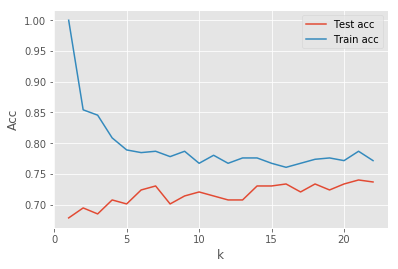

In [77]:
plt.plot(k, test_acc, label='Test acc')
plt.plot(k, train_acc, label='Train acc')
plt.legend()
plt.xlabel('k')
plt.ylabel('Acc')
plt.show();

In [93]:
knn = KNeighborsClassifier(n_neighbors=21)

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [95]:
knn.score(X_test, y_test)

0.7402597402597403

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
y_pred = knn.predict(X_test)

In [110]:
confusion_matrix(y_test, y_pred)

array([[173,  28],
       [ 55,  52]])

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       201
           1       0.65      0.49      0.56       107

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,50)}

In [103]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5).fit(X, y)

In [104]:
knn_cv.best_score_

0.7578125

In [105]:
knn_cv.best_params_

{'n_neighbors': 14}

In [106]:
knn = KNeighborsClassifier(n_neighbors=14)

In [107]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')

In [108]:
y_pred = knn.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       201
           1       0.65      0.49      0.56       107

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



In [112]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
print(accuracy_score(y_test, y_pred))

0.7305194805194806


In [115]:
from sklearn import datasets

In [117]:
wine = datasets.load_wine()

In [119]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [120]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [124]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [125]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [126]:
print(wine.data.shape)

(178, 13)


In [127]:
print(wine.target.shape)

(178,)


In [132]:
k = 7

In [128]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [129]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [130]:
y_pred = knn.predict(X_test)

In [131]:
accuracy_score(y_test, y_pred)

0.7037037037037037

In [133]:
knn = KNeighborsClassifier(n_neighbors=k)

In [134]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [135]:
y_pred = knn.predict(X_test)

In [136]:
accuracy_score(y_test, y_pred)

0.7407407407407407

In [138]:
print(wine.data.shape)

(178, 13)
